In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
missing_data = df.isnull()
# missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

## Deal with missing data
- drop data
    - a. drop the whole row
    - b. drop the whole column
- replace data
    - a. replace it by mean
    - b. replace it by frequency
    - c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

- Replace by mean:

- "normalized-losses": 41 missing data, replace them with mean
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean
- "peak-rpm": 2 missing data, replace them with mean

### Replace by frequency:

- "num-of-doors": 2 missing data, replace them with "four".
- Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

### Drop the whole row:

- "price": 4 missing data, simply delete the whole row
- Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us
- Calculate the average of the columns : "normalized-losses", 'bore', 'horsepower' and 'peak-rpm'
- Replace "NaN" by mean value in that particular column

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",avg_bore)

Average of Bore Values: 3.3297512437810943


In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [ ]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",avg_bore)

df["stroke"].replace(np.nan,avg_stroke,inplace = True)

Average of Stroke Values: 3.3297512437810943


In [ ]:
avg_horsepower = df['horsepower'].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [ ]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [ ]:
df['num-of-doors'].value_counts()


num-of-doors
four    114
two      89
Name: count, dtype: int64

In [ ]:
# We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent
df['num-of-doors'].replace(np.nan,"four",inplace=True)

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"],axis=0,inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization
Data is usually collected from different agencies with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

In [ ]:
df["city-L/100km"] = 235 / df["city-mpg"]

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [ ]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# Data Normalization
Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [ ]:
# replace (original value) by (original value)/(maximum value)
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.


In [ ]:
df["horsepower"] = df["horsepower"].astype(int,copy=True)

Text(0.5, 1.0, 'HORSEPOWER BINS')

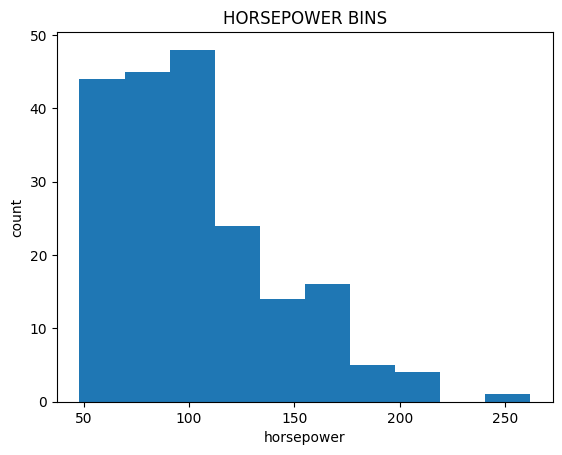

In [ ]:
plt.hist(df["horsepower"])

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("HORSEPOWER BINS")

3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
# We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names ,include_lowest = True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:

df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

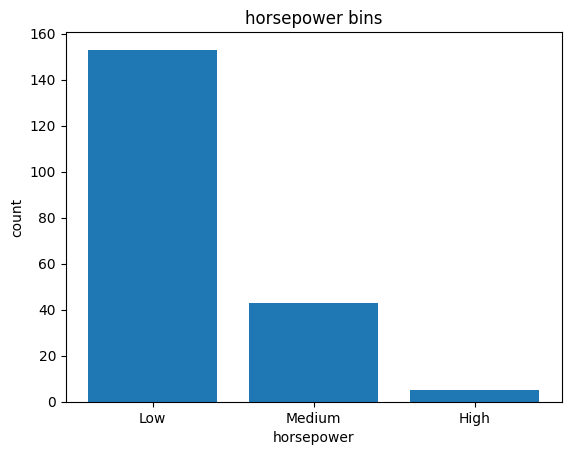

In [ ]:
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

By checking the dataframe above carefully, we can find that the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High").

### Bins visualization
Normally, a histogram is used to visualize the distribution of bins

Text(0.5, 1.0, 'horsepower bins')

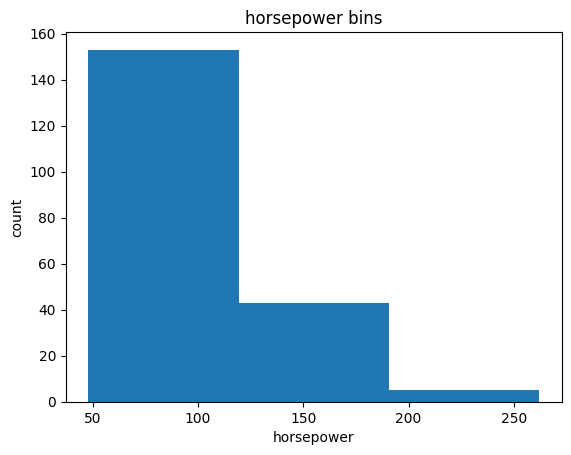

In [ ]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':"aspiration-std",'turbo':"aspiration-turbo"},inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [ ]:
df = pd.concat([df,dummy_variable_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)

In [ ]:
df.shape

(201, 30)

In [ ]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


# 1. Linear Regression and Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

Using simple
linear regression, we will create a linear function with “highway-mpg” as the predictor variable and
the “price” as the response variable.

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X, Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
(lm.intercept_, lm.coef_)

(-14617.843054664605, array([3458.68511314]))

In [ ]:
lm1=LinearRegression()
lm1


LinearRegression()

In [ ]:
x=df[['engine-size']]
y=df['price']
lm1.fit(x,y)
yhat=lm1.predict(x)
(lm.intercept_, lm.coef_)

(-14617.843054664605, array([3458.68511314]))

In [ ]:
 # using X and Y
Yhat=-14617.843054664605 + 3458.68511314*X
Price=-14617.843054664605 + 3458.68511314*df['engine-size']


# Multiple Linear Regression
What if we want to predict car price using more than one variable?
If we want to use more variables in our model to predict car price, we can use Multiple Linear
Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method
is used to explain the relationship between one continuous response (dependent) variable and two or
more predictor (independent) variables. Most of the real-world regression models involve multiple
predictors

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [ ]:
lm.fit(Z, df['price'])
(lm.intercept_, lm.coef_)

(-14385.634549360107,
 array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785]))

In [ ]:
lm2=LinearRegression()
Z1 = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z1,y)
(lm2.coef_, lm2.intercept_)

(array([-2.86467994e+00,  3.46770737e+03]), -14340.935762266607)

## Model Evaluation Using Visualization
Now that we’ve developed some models, how do we evaluate our models and choose the best one?
One way to do this is by using a visualization.

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by
using regression plots.
This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted
linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive
or negative correlation).
Let’s visualize highway-mpg as potential predictor variable of price:

(0.0, 47708.958697375885)

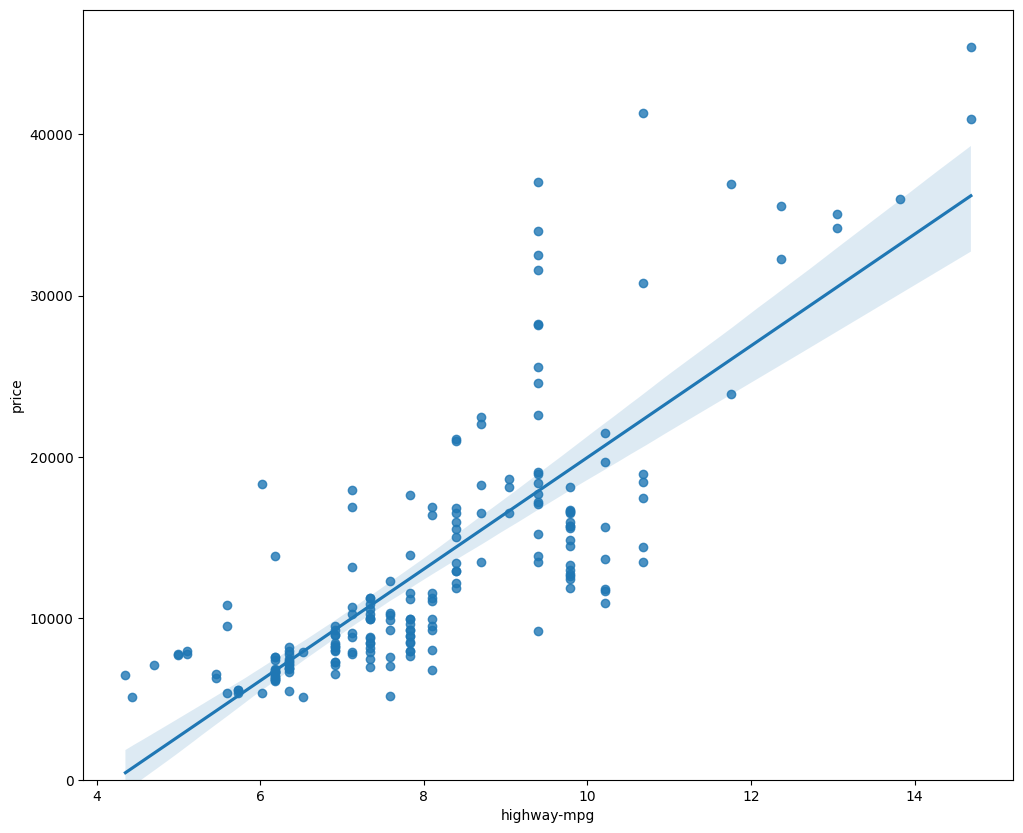

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Price is positively correlate with highway-mpg

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered
the data points are around the regression line. This will give you a good indication of the variance
of the data and whether a linear model would be the best fit or not. If the data is too far off from
the line, this linear model might not be the best model for this data.

Let’s compare this plot to the regression plot of “peak-rpm”.

(0.0, 47414.1)

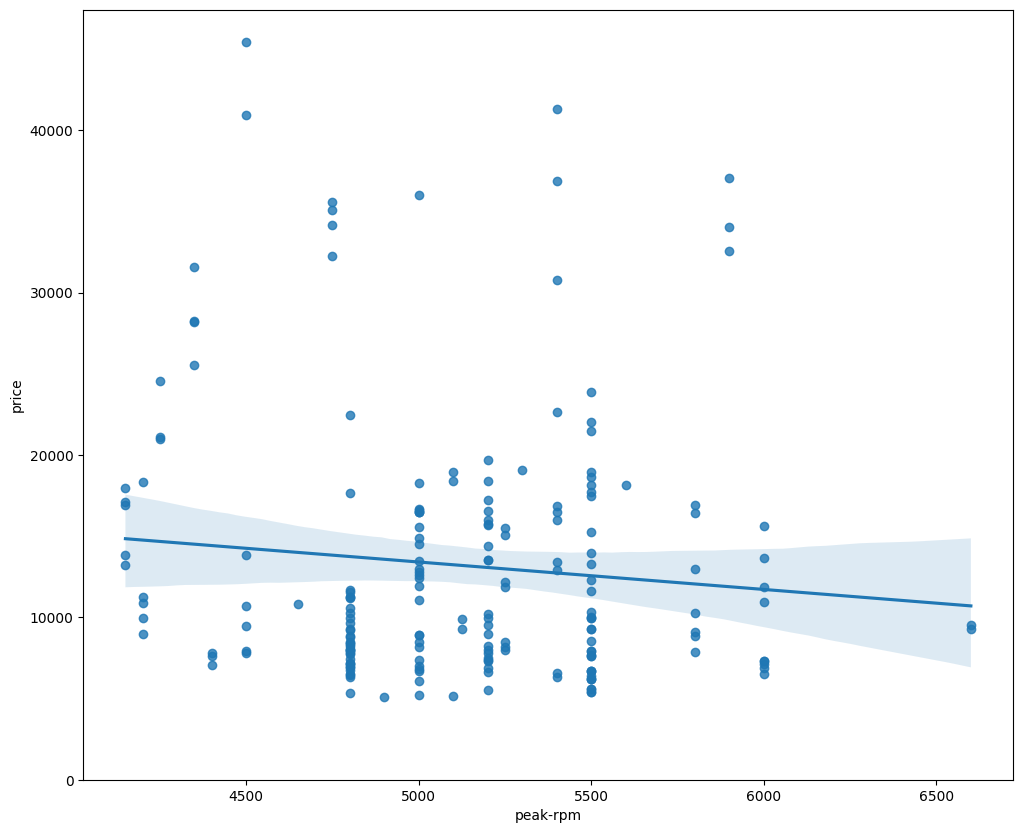

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of “peak-rpm” and “highway-mpg”, we see that the points for
“highway-mpg” are much closer to the generated line and, on average, decrease. The points for
“peak-rpm” have more spread around the predicted line and it is much harder to determine if the
points are decreasing or increasing as the “peak-rpm” increases

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,0.017694,-0.101616
highway-mpg,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


# Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

### What is a residual?
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

### So what is a residual plot?
A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

### What do we pay attention to when looking at a residual plot?
We look at the spread of the residuals:
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
- Randomly spread out residuals means that the variance is constant, and thus the
linear model is a good fit for this data.


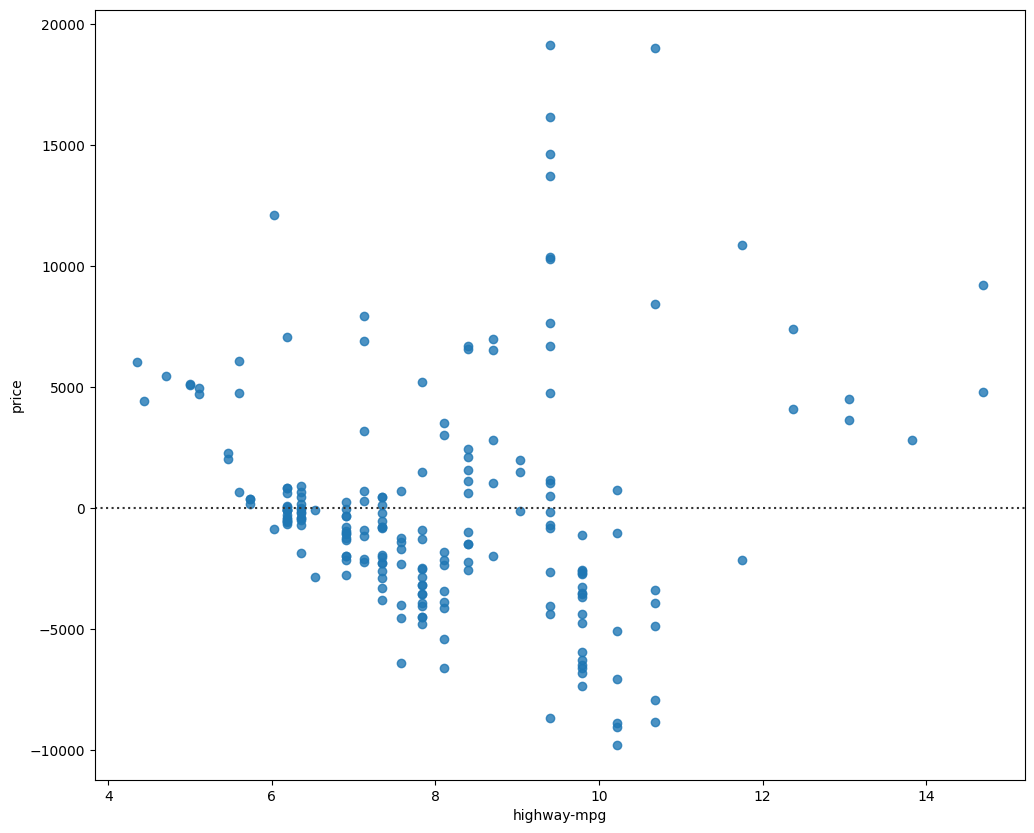

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

## What is this plot telling us?
We can see from this residual plot that the residuals are not randomly spread around the x-axis,
leading us to believe that maybe a non-linear model is more appropriate for this data.




# 2. Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can’t visualize it with regression or residual plot.
One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [ ]:
Y_hat = lm.predict(Z)


<ipython-input-65-584e4bebee07>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], color="r", label="Actual Value")
<ipython-input-65-584e4bebee07>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


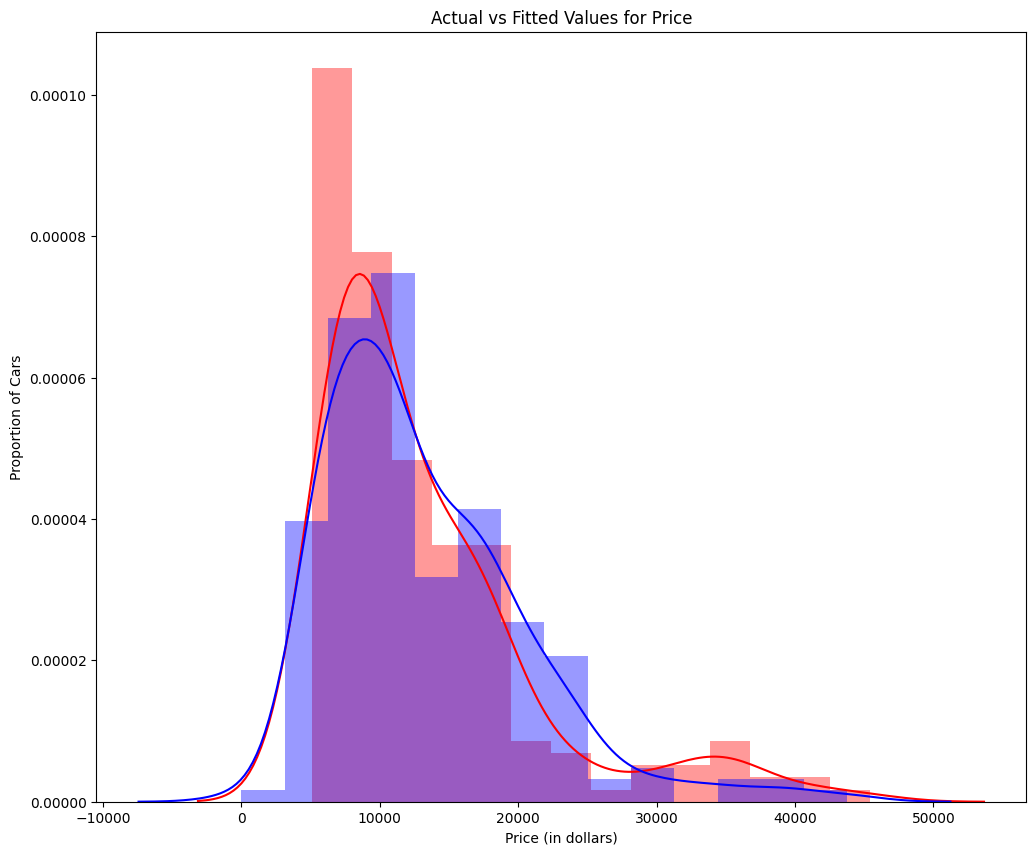

In [ ]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], color="r", label="Actual Value")
sns.distplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values since the two distributions
overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear
regression models.
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


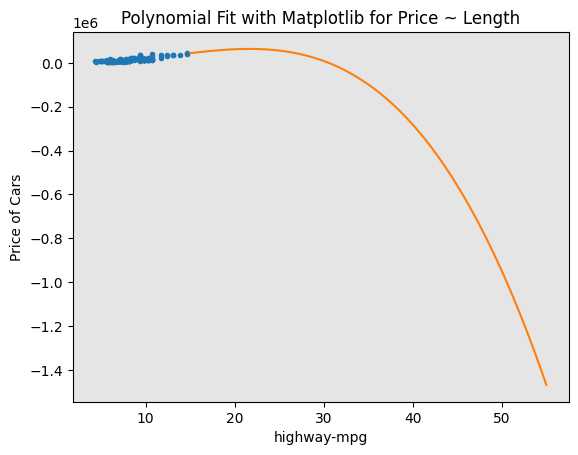

In [ ]:
x = df['highway-mpg']
y = df['price']
 # Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)


array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [ ]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)


          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape, Z_pr.shape

((201, 4), (201, 15))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

In [ ]:
Input=[("scale",StandardScaler()),("model",LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]


array([14055.08612634, 14055.08612634, 18638.8884263 , 10758.2803759 ])

Evaluation metrics is crucial when assessing the performance of predictive models. Here's a detailed explanation of R-squared (R²) and Mean Squared Error (MSE):

### R-squared (R²):

- **Definition**: R-squared, also known as the coefficient of determination, measures how well the regression model approximates real data points. It indicates the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (features) in the model.
  
- **Interpretation**:
  - R-squared values range from 0 to 1.
  - \( R^2 = 1 \) indicates that the model explains all the variability of the response data around its mean.
  - \( R^2 = 0 \) suggests that the model does not explain any of the variability of the response data around its mean.
  - Higher values of \( R^2 \) indicate a better fit of the model to the data.

- **Usage**:
  - It is often used to compare different models. A higher \( R^2 \) generally indicates a better fit, but this must be balanced with model complexity and overfitting.

### Mean Squared Error (MSE):

- **Definition**: MSE measures the average of the squares of the errors—that is, the average squared difference between predicted values (\( \hat{y} \)) and actual values (\( y \)).
  
- **Calculation**:
  \[
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  \]
  where \( n \) is the number of observations, \( y_i \) is the actual value, and \( \hat{y}_i \) is the predicted value for observation \( i \).

- **Interpretation**:
  - MSE provides a relative measure of how close the predicted values are to the actual values.
  - Lower MSE values indicate better model performance, as they reflect smaller squared differences between predicted and actual values.

- **Usage**:
  - MSE is widely used in regression problems to assess the quality of the model's predictions.
  - It's sensitive to outliers, meaning large errors (outliers) contribute disproportionately to the MSE.

### Choosing Between R-squared and MSE:

- **R-squared** gives an overall measure of how well the model fits the data.
- **MSE** provides a more detailed view of the model's accuracy in predicting individual data points.

When evaluating models, it's often beneficial to consider both metrics together:
- **R-squared** for assessing overall goodness of fit.
- **MSE** for understanding the average prediction error.

Together, these metrics provide a comprehensive view of a model's performance in terms of both fit to the data and prediction accuracy.


Model 1: Simple Linear Regression

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894513258818


calculate the MSE:

In [ ]:
# We can predict the output i.e., “yhat” using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])


The output of the first four predicted value is:  [15485.52737455 15485.52737455 16643.34931414 12475.19033163]


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  22510543.777085222


Model 2: Multiple Linear Regression

In [ ]:
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))


The R-square is:  0.811811561534475


We can say that 81 % of the variation of price is explained by this multiple linear regression “multi_fit”

In [ ]:
Y_predict_multifit = lm.predict(Z)
print(mean_squared_error(df['price'], Y_predict_multifit))

11826072.956532085


Model 3: Polynomial Fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.7205127147168189


We can say that ~72 % of the variation of price is explained by this polynomial fit

In [ ]:
# MSE
mean_squared_error(df['price'], p(x))

17563443.605423704

# Prediction and Decision Making Prediction

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209,
         2675.58251105])

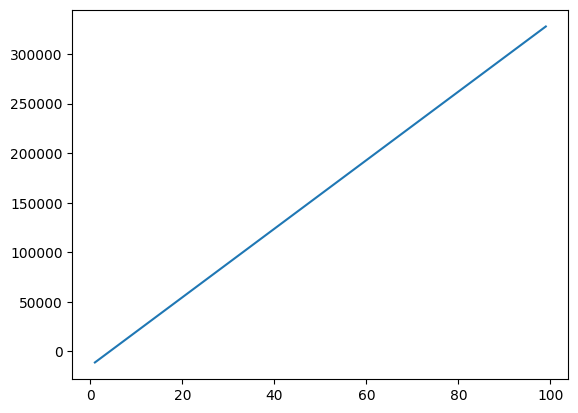

In [ ]:
plt.plot(new_input, yhat)
plt.show()

how we determine a good model fit using R-squared (R²) and Mean Squared Error (MSE), and how we interpret the results for different models:

### Understanding R-squared (R²) and MSE:

1. **R-squared (R²)**:
   - **Definition**: R-squared measures how well the regression model fits the observed data. It ranges from 0 to 1, where 1 indicates a perfect fit.
   - **Interpretation**: Higher R-squared values indicate that more variation in the dependent variable (price in this case) is explained by the independent variables (predictors).
   - **Comparison**: When comparing models, a higher R-squared indicates a better fit, as it suggests that the model can better explain the variation in the data.

2. **Mean Squared Error (MSE)**:
   - **Definition**: MSE measures the average squared difference between predicted values and actual values.
   - **Interpretation**: Lower MSE values indicate smaller errors between predicted and actual values, suggesting better model accuracy.
   - **Comparison**: When comparing models, the model with the smallest MSE is considered to have a better fit, as it implies that the model's predictions are closer to the actual values on average.

### Model Comparison:

Now, let's analyze the results for the different models provided:

1. **Simple Linear Regression (SLR) using Highway-mpg**:
   - R-squared: 0.49
   - MSE: \( 3.17 \times 10^7 \)

2. **Multiple Linear Regression (MLR) using Horsepower, Curb-weight, Engine-size, and Highway-mpg**:
   - R-squared: 0.80
   - MSE: \( 1.2 \times 10^7 \)

3. **Polynomial Fit using Highway-mpg**:
   - R-squared: 0.70
   - MSE: \( 1.8 \times 10^7 \)

### Comparing Models:

- **SLR vs. MLR**:
  - **MSE**: SLR has \( 3.17 \times 10^7 \), while MLR has \( 1.2 \times 10^7 \). The smaller MSE of MLR indicates better predictive accuracy.
  - **R-squared**: SLR has 0.49, whereas MLR has 0.80. The higher R-squared of MLR indicates a better fit in explaining the variance in price.

  Conclusion: MLR is preferred over SLR due to its significantly higher R-squared and lower MSE.

- **SLR vs. Polynomial Fit**:
  - **MSE**: Polynomial Fit has a smaller MSE compared to SLR.
  - **R-squared**: Polynomial Fit also has a higher R-squared compared to SLR.

  Conclusion: Polynomial Fit performs better than SLR in terms of both MSE and R-squared.

- **MLR vs. Polynomial Fit**:
  - **MSE**: MLR has a smaller MSE compared to Polynomial Fit.
  - **R-squared**: MLR has a higher R-squared compared to Polynomial Fit.

  Conclusion: MLR is superior to Polynomial Fit in terms of both MSE and R-squared.



## Overall Conclusion:

Comparing all three models (SLR, MLR, Polynomial Fit), the **Multiple Linear Regression (MLR)** model stands out as the best model for predicting the price based on the dataset provided. This conclusion is supported by its highest R-squared value (0.80), indicating the best fit to the data, and its lowest MSE (1.2 x 10^7), indicating the smallest average prediction error.

Therefore, in this analysis, the MLR model using Horsepower, Curb-weight, Engine-size, and Highway-mpg as predictors is recommended for predicting car prices from the dataset.